# Patient Satisfaction - Visualization

## Import Library and Datasets

In [13]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter
import geopandas as gpd

In [14]:
# Read the data from different years into DataFrames
completed_df = pd.read_csv("../data/processed/completed_data.csv", index_col=0)
byRegion_df = pd.read_csv('../data/processed/region_statistics.csv', index_col=0)
byState_df = pd.read_csv('../data/processed/state_statistics.csv', index_col=0)

## Visualization

### Correlation

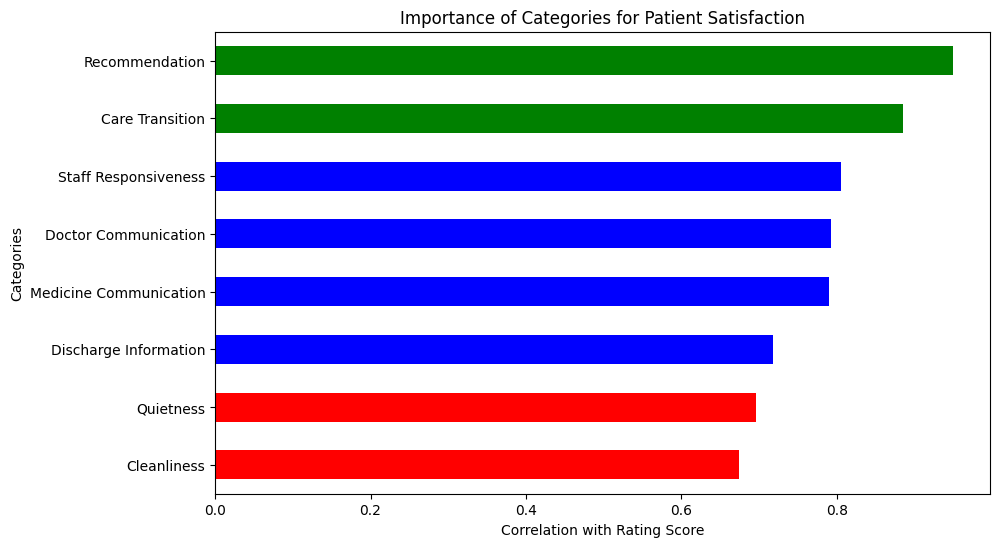

In [15]:
# NATIONWIDE
# Calculate correlation matrix among LINEAR SCORES
corr_matrix = completed_df.loc[:, completed_df.columns[7:16]].corr()

# Extract correlation coefficients for Rating Score
nation_correlation = corr_matrix['Rating Score'].abs().sort_values(ascending=False).drop('Rating Score')
# Set colors top 2 and bottom 2
colors = ['green' if Measure in nation_correlation[:2].index else 'red' if Measure in nation_correlation[-2:].index else 'blue' for Measure in nation_correlation.index.values]

# Plot bar chart
plt.figure(figsize=(10, 6))
nation_correlation.plot(kind='barh', color=colors)
plt.xlabel('Correlation with Rating Score')
plt.ylabel('Categories')
plt.title('Importance of Categories for Patient Satisfaction')
plt.gca().invert_yaxis()
plt.show()

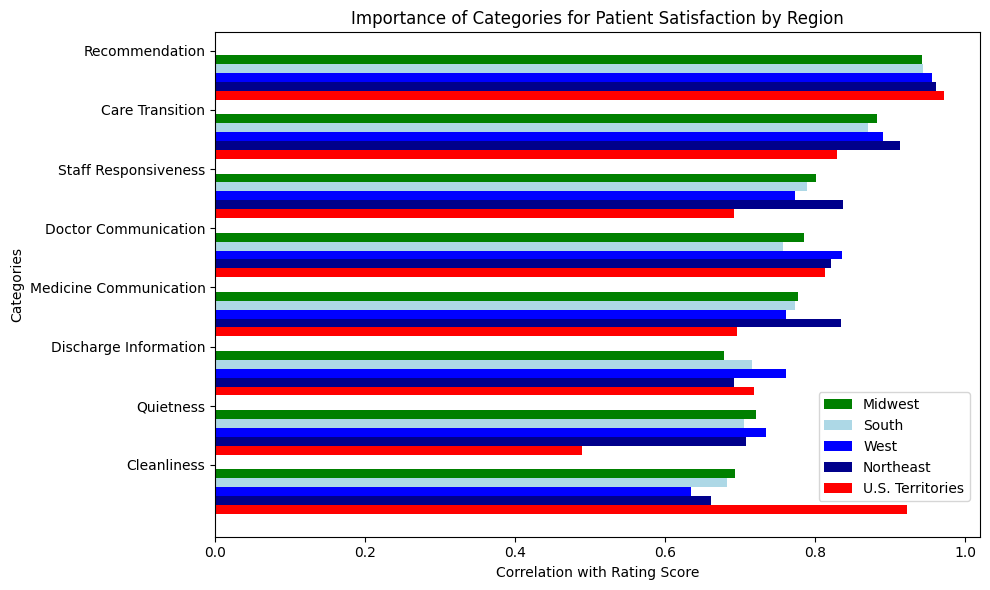

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Define regions and corresponding colors
region_colors = {
    'Midwest': 'green',
    'South': 'lightblue',
    'West': 'blue',
    'Northeast': 'darkblue',
    'U.S. Territories': 'red'
}

# Initialize the plot
plt.figure(figsize=(10, 6))

# Iterate over each region
for i, (region, color) in enumerate(region_colors.items(), start=1):
    # Filter DataFrame for the current region
    corr_matrix = completed_df[completed_df['Region'] == region]
    corr_matrix = corr_matrix.loc[:, corr_matrix.columns[7:16]].corr()
    
    # Extract correlation coefficients for Rating Score
    rating_correlation = corr_matrix['Rating Score'].abs().drop('Rating Score')
    
    # Sort categories by the order of total correlation coefficients
    rating_correlation = rating_correlation.reindex(nation_correlation.index)
        
    # Plot a horizontal bar chart for the current region
    plt.barh(np.arange(len(rating_correlation)) + i*0.15, rating_correlation.values, height=0.15, color=color, label=region)

# Customize the plot
plt.xlabel('Correlation with Rating Score')
plt.ylabel('Categories')
plt.title('Importance of Categories for Patient Satisfaction by Region')
plt.yticks(np.arange(len(rating_correlation)), rating_correlation.index)
plt.gca().invert_yaxis()
plt.legend(loc='upper left', bbox_to_anchor=(.78, 0.30))

# Show the plot
plt.tight_layout()
plt.show()


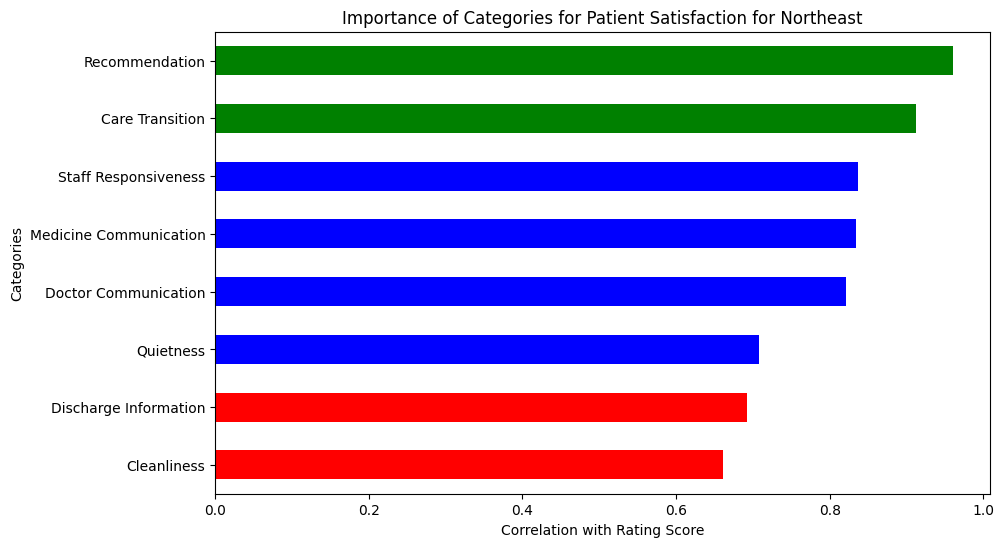

In [17]:
# BY REGION
# Most relevant features for Patience satisfaction
corr_matrix = completed_df[completed_df['Region'] == 'Northeast']
corr_matrix = corr_matrix.loc[:, corr_matrix.columns[7:16]].corr()

# Extract correlation coefficients for Rating Score
rating_correlation = corr_matrix['Rating Score'].abs().sort_values(ascending=False).drop('Rating Score')
# Set colors top 2 and bottom 2
colors = ['green' if Measure in rating_correlation[:2].index else 'red' if Measure in rating_correlation[-2:].index else 'blue' for Measure in rating_correlation.index.values]

# Plot bar chart
plt.figure(figsize=(10, 6))
rating_correlation.plot(kind='barh', color=colors)
plt.xlabel('Correlation with Rating Score')
plt.ylabel('Categories')
plt.title('Importance of Categories for Patient Satisfaction for Northeast')
plt.gca().invert_yaxis()
plt.show()

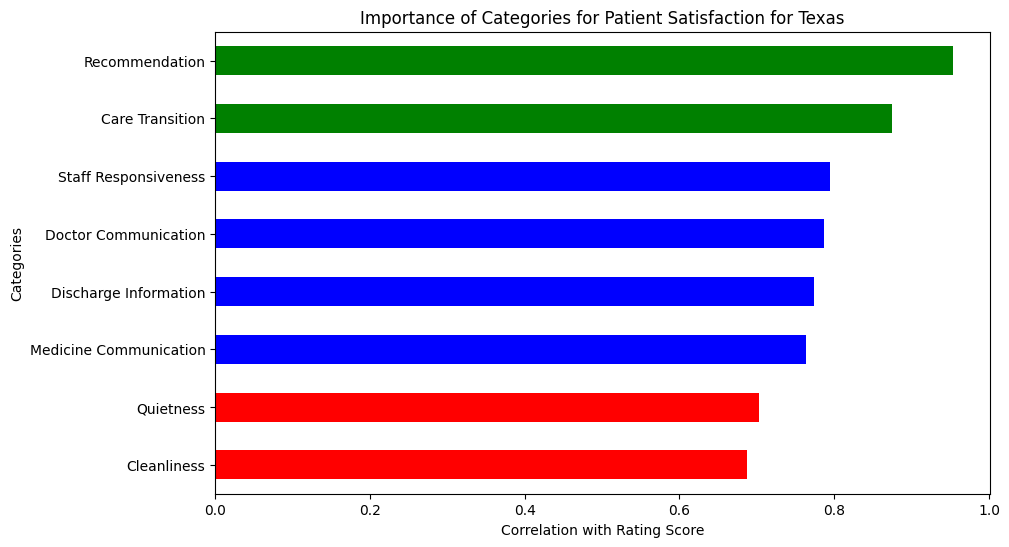

In [18]:
# BY STATE
#Most relevant features for Patience satisfaction Indiana
corr_matrix = completed_df[completed_df['State'] == 'TX']
corr_matrix = corr_matrix.loc[:, corr_matrix.columns[7:16]].corr()

# Extract correlation coefficients for Rating Score
rating_correlation = corr_matrix['Rating Score'].abs().sort_values(ascending=False).drop('Rating Score')
# Set colors top 2 and bottom 2
colors = ['green' if Measure in rating_correlation[:2].index else 'red' if Measure in rating_correlation[-2:].index else 'blue' for Measure in rating_correlation.index.values]

# Plot bar chart
plt.figure(figsize=(10, 6))
rating_correlation.plot(kind='barh', color=colors)
plt.xlabel('Correlation with Rating Score')
plt.ylabel('Categories')
plt.title('Importance of Categories for Patient Satisfaction for Texas')
plt.gca().invert_yaxis()
plt.show()

### Comparions by Regions

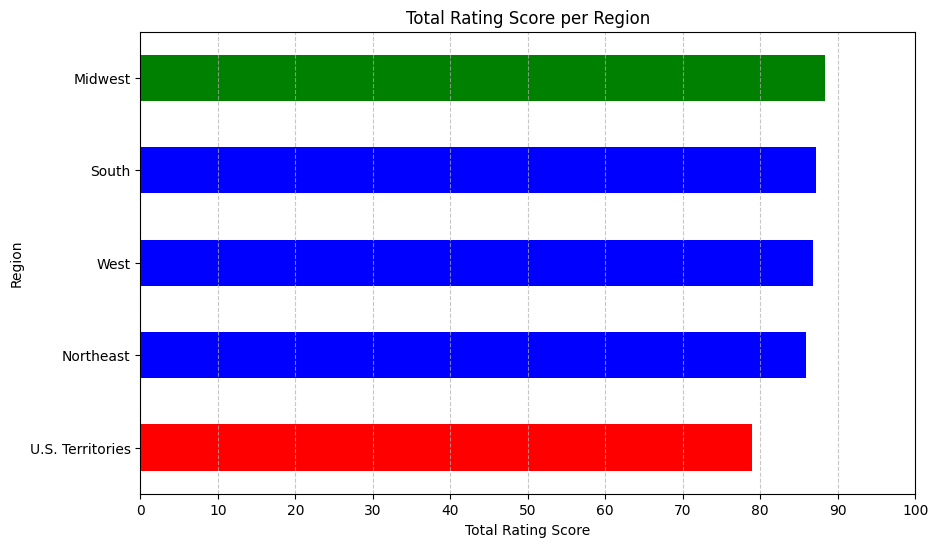

In [19]:
colors = ['green' if Region == 'Midwest' else 'red' if Region == 'U.S. Territories' else 'blue' for Region in byRegion_df.index.values]
# Plot the total rating score per region
byRegion_df['Rating Score'].plot(kind='barh', figsize=(10, 6), color =colors)
plt.title('Total Rating Score per Region')
plt.ylabel('Region')
plt.xlabel('Total Rating Score')
plt.xticks(np.arange(0, 110, 10))
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


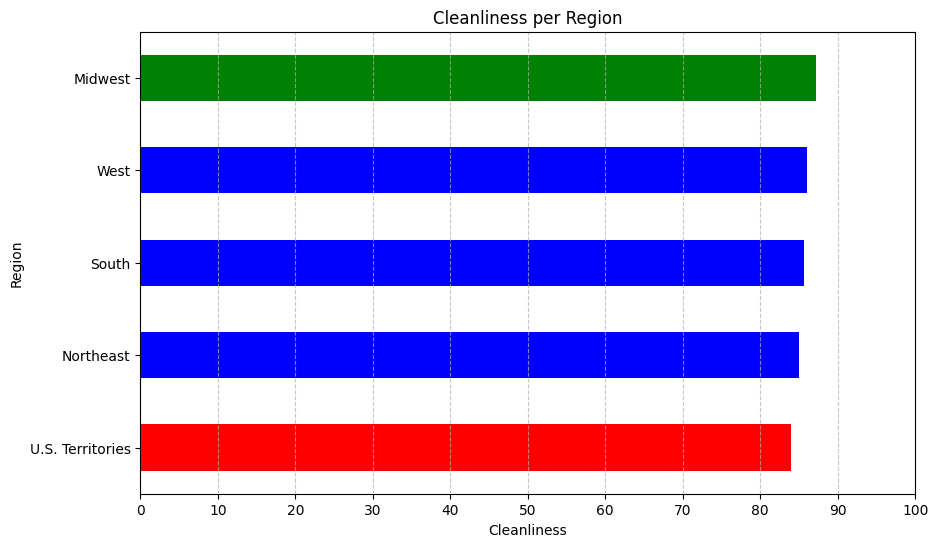

In [20]:

category = 'Cleanliness'
colors = ['green','blue','blue','blue','red']
# Plot the total rating score per region
byRegion_df[category].sort_values(ascending=False).plot(kind='barh', figsize=(10, 6), color =colors)
plt.title(category + ' per Region')
plt.ylabel('Region')
plt.xlabel(category)
plt.xticks(np.arange(0, 110, 10))
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Overall Score by State

<Figure size 800x1000 with 0 Axes>

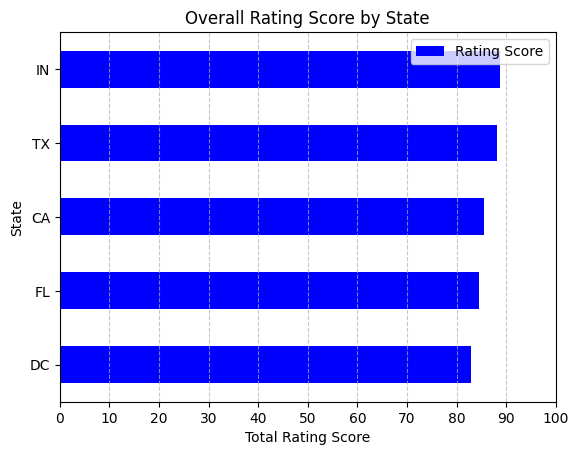

In [21]:
# Plot by State
colors = ['blue','red','blue','blue','blue']
# Plot the total rating score per region
plt.figure(figsize=(8, 10))
byState_df.loc[['IN', 'TX', 'CA', 'FL','DC'],['Rating Score'] ].plot(kind='barh', color = colors)
plt.title('Overall Rating Score by State')
plt.ylabel('State')
plt.xlabel('Total Rating Score')
plt.gca().invert_yaxis()
#plt.yticks(rotation=0)
plt.xticks(np.arange(0, 110, 10))
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### Map Visualization By States

In [43]:
def makeUsaMapVisualization(dataframe, state_column_name, variable):
    
    # Merge DataFrame wtih gdf
    gdf = gpd.read_file('./cb_2018_us_state_500k/')
    gdf = gdf.merge(dataframe,left_on='STUSPS',right_on=state_column_name)

    # Apply this the gdf to ensure that all states are assigned colors by the same function
    def makeColorColumn(gdf,variable,vmin,vmax):
        # apply a function to a column to create a new column of assigned colors & return full frame
        norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
        mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.YlOrBr)
        gdf['value_determined_color'] = gdf[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
        return gdf
    
    # Assigning color to states on dataframe
    gdf = makeColorColumn(gdf,variable,gdf[variable].min(),gdf[variable].max())

    # create "visframe" as a re-projected gdf using EPSG 2163
    visframe = gdf.to_crs({'init':'epsg:2163'})

    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(16, 12))
    # remove the axis box around the vis
    ax.axis('off')

    # add a title and annotation
    ax.set_title('Patient Satisfaction - '+variable, fontdict={'fontsize': '42', 'fontweight' : '1'})

    # Create colorbar legend
    fig = ax.get_figure()
    # add colorbar axes to the figure
    # l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
    cbax = fig.add_axes([0.8, 0.3, 0.03, 0.25])

    cbax.set_title(variable, fontdict={'fontsize': '15', 'fontweight' : '0'})

    # Add continuous color scale 
    sm = plt.cm.ScalarMappable(cmap="YlOrBr", norm=plt.Normalize(vmin=gdf[variable].min(), vmax=gdf[variable].max()))

    comma_fmt = FuncFormatter(lambda x, p: format(x/100, '.0%'))
    fig.colorbar(sm, cax=cbax, format=comma_fmt)
    cbax.tick_params(labelsize=16)
    ax.annotate("Data: Centers for Medicare & Medicaid Services Data, snapshot date 01/31/2024", xy=(0.22, .085), xycoords='figure fraction', fontsize=14, color='#555555')

    # create map
    # Note: we're going state by state here because of unusual coloring behavior when trying to plot the entire dataframe using the "value_determined_color" column
    for row in visframe.itertuples():
        if row.STUSPS not in ['AK','HI']:
            c = gdf[gdf.STUSPS==row.STUSPS][0:1].value_determined_color.item()
            visframe[visframe.STUSPS==row.STUSPS].plot(color=c, linewidth=0.8, ax=ax, edgecolor='0.8')
            # Add State labels to the map
            ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row.STUSPS, fontsize=10, ha='center')
        



c:\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


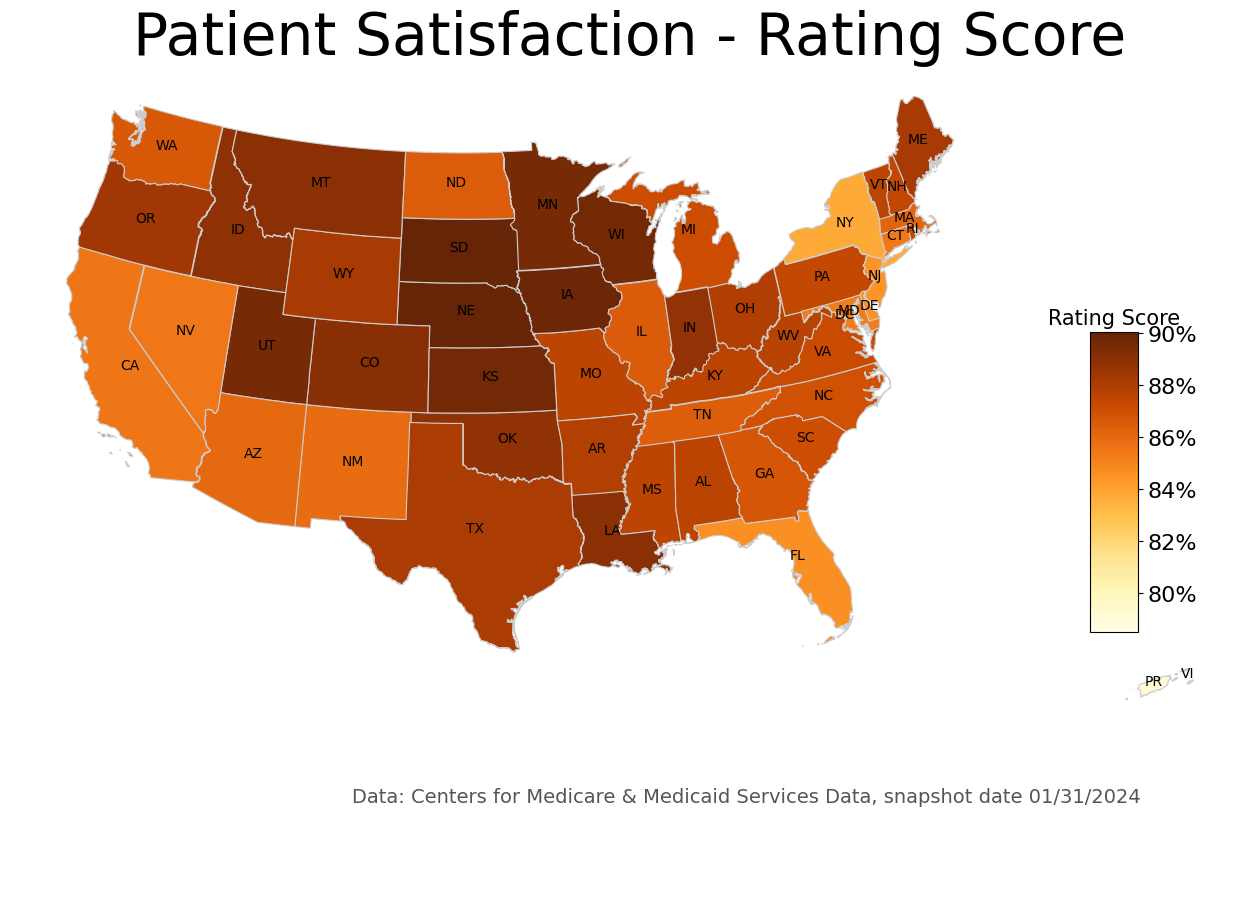

In [44]:
# Generate Map Visualization Rating Score
makeUsaMapVisualization(byState_df, 'State','Rating Score')

c:\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


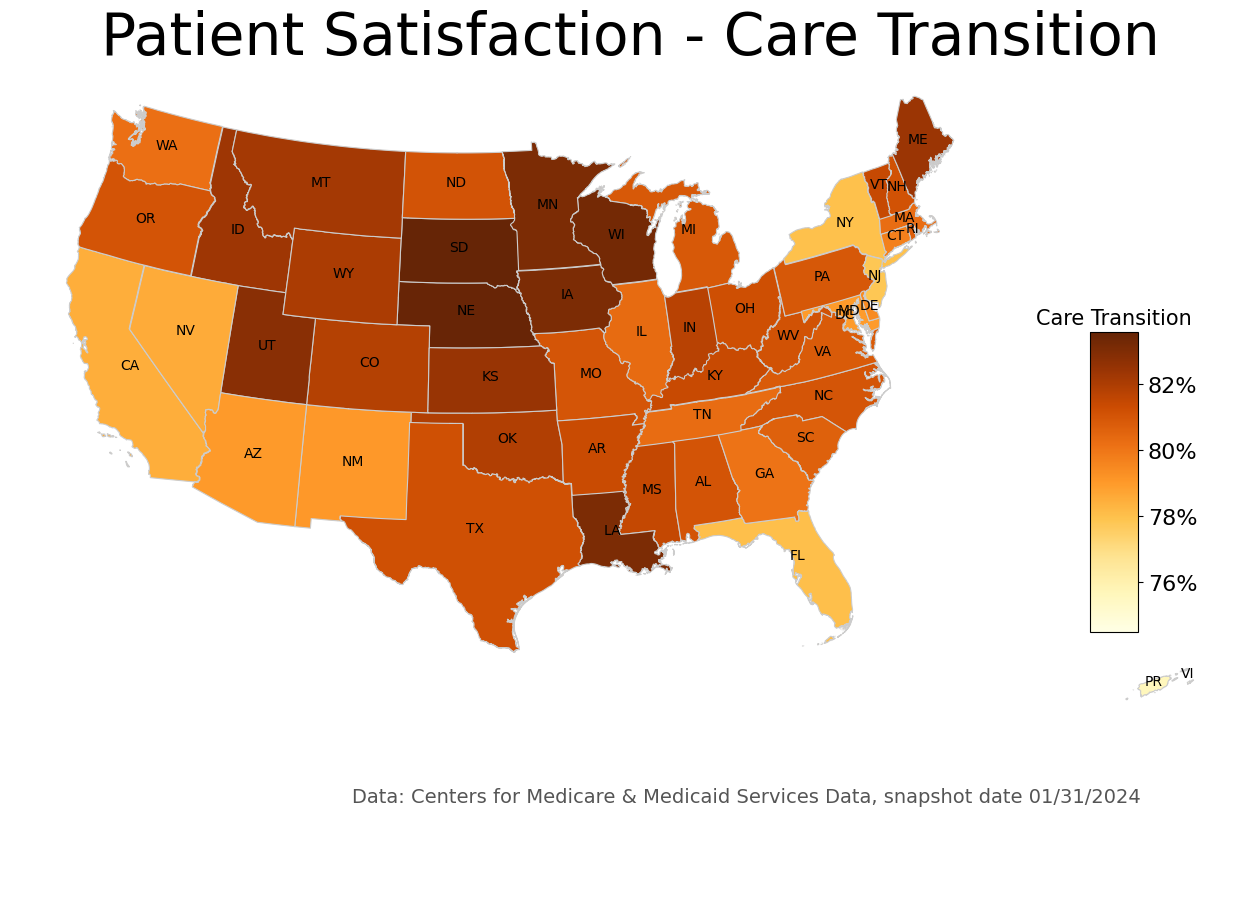

In [45]:
# Generate Map Visualization Care Transition
makeUsaMapVisualization(byState_df, 'State','Care Transition')

c:\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


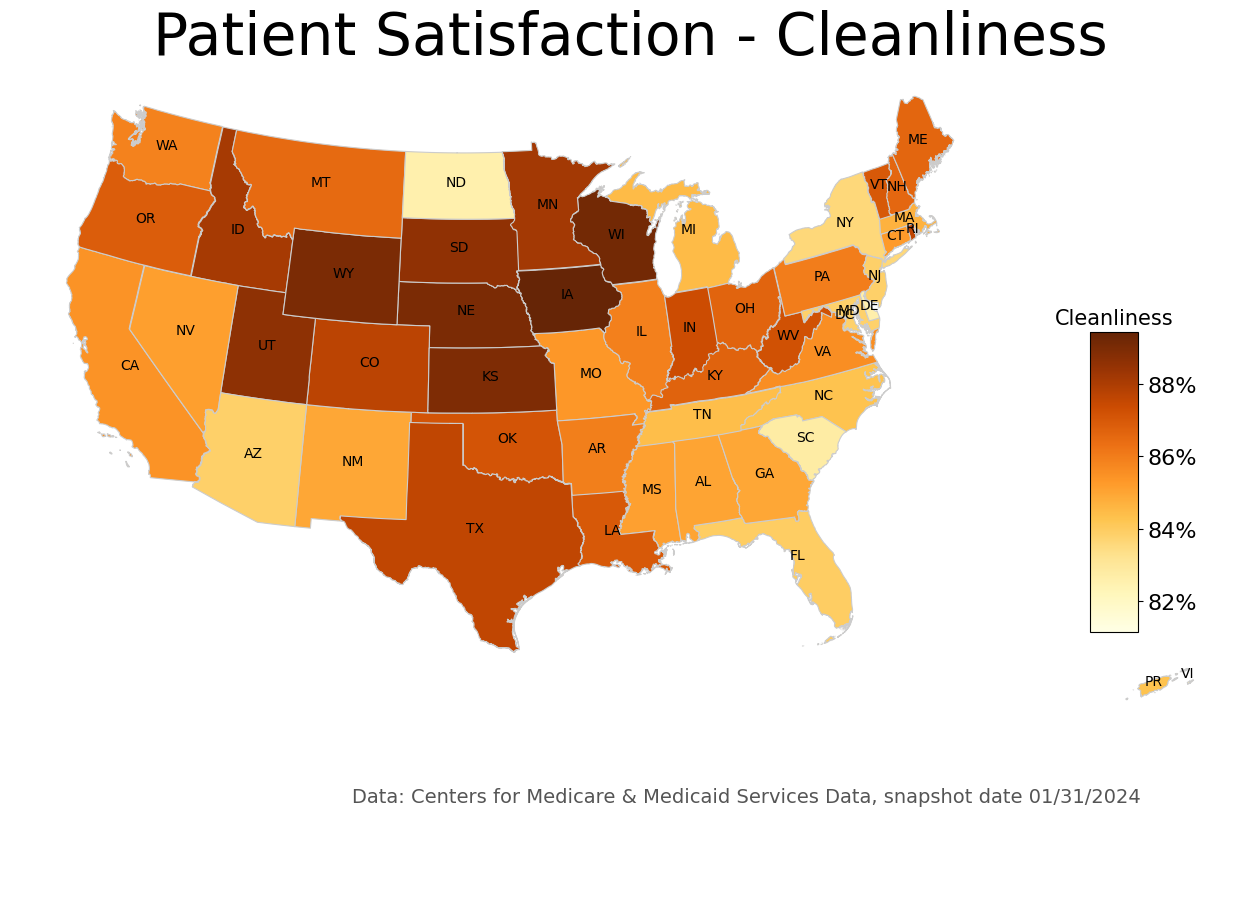

In [46]:
# Generate Map Visualization Care Transition
makeUsaMapVisualization(byState_df, 'State','Cleanliness')